In [14]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import csv
from scipy.stats import gaussian_kde

In [19]:
# Obtenemos el ground truth
path = "C:/Users/Bruno/OneDrive - Universidad de Chile/BGMG/CASE/git_repositories/degradation_model/uncertainty_characterization/eta_values_sorted.csv"
eta_values = pd.read_csv(path,delimiter=',',header=None)
eta_values = eta_values.values.flatten()
eta_values

array([0.9961524 , 0.99622295, 0.99652652, 0.99667957, 0.99722477,
       0.99794173, 0.9980558 , 0.99820071, 0.99840968, 0.99847748,
       0.99853393, 0.99861424, 0.99868648, 0.99870144, 0.99895627,
       0.99910649, 0.99912282, 0.99919586, 0.99925409, 0.99933272,
       0.99937784, 0.99947238, 0.99947339, 0.99954139, 0.99955409,
       0.99955638, 0.99956449, 0.99959158, 0.99960219, 0.99962339,
       0.99962789, 0.99964035, 0.99964104, 0.99964391, 0.99964894,
       0.99966727, 0.9996737 , 0.99968214, 0.99969915, 0.99970664,
       0.99972005, 0.99972283, 0.9997237 , 0.99972573, 0.99973176,
       0.99973411, 0.99973807, 0.99973915, 0.99974546, 0.99975146,
       0.99975229, 0.9997529 , 0.99975694, 0.99976141, 0.99976774,
       0.99977075, 0.99978029, 0.99978315, 0.99978765, 0.99978874,
       0.99979241, 0.99979856, 0.99980301, 0.99980307, 0.99981942,
       0.999826  , 0.99983238, 0.99983294, 0.99983526, 0.99983585,
       0.99983634, 0.99984106, 0.99984626, 0.99984994, 0.99985

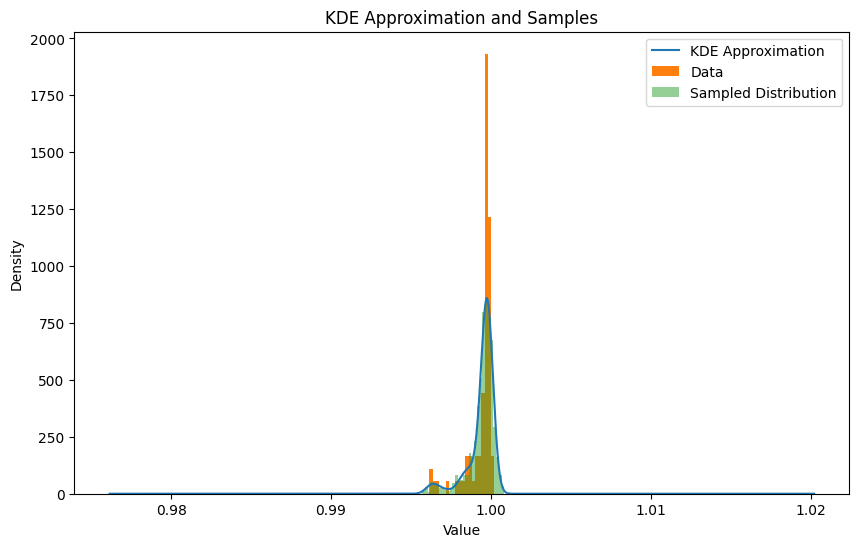

In [21]:

# Step 2: Create the KDE object
kde = gaussian_kde(eta_values)

# Step 3: Define the range for evaluation
x_range = np.linspace(min(eta_values) - 0.02, max(eta_values) + 0.02, 1000)

# Step 4: Evaluate the KDE on the range
kde_values = kde.evaluate(x_range)

# Step 5: Extract samples from the estimated distribution
num_samples = 1000  # Number of samples you want to generate
samples = kde.resample(num_samples)

# Step 6: Plot the KDE and the samples
plt.figure(figsize=(10, 6))
plt.plot(x_range, kde_values, label='KDE Approximation')
plt.hist(eta_values,20,density=True, label='Data')
v = plt.hist(samples.T, bins=30, density=True, alpha=0.5, label='Sampled Distribution')
plt.title('KDE Approximation and Samples')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

In [53]:
path = "C:/Users/Bruno/OneDrive - Universidad de Chile/BGMG/CASE/git_repositories/degradation_model/uncertainty_characterization/total_eta_values.csv"
eta_values = pd.read_csv(path,delimiter=';',)
eta_values = eta_values['0']
kde = gaussian_kde(eta_values)
samples = kde.resample(1)[0][0]


0.9995761165039272